# **Dataset: 'catdogmonkey' with annotations**

**Importing Libraries**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

**Displaying Annotated Images**

Image Name:  dog-Walk-6-_JPG.rf.0973c1864a80554346a093622efbbebb.jpg


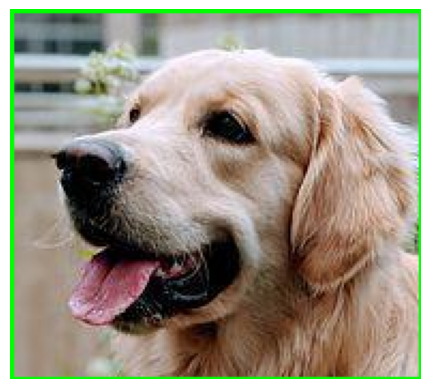

Image Name:  806de635-cats_and_dogs_4_jpg.rf.4cea0d91840baf40dbea23d4ab62d2e7.jpg


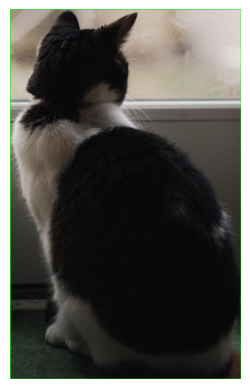

Image Name:  Pet-Eat-61-_JPG.rf.f390532269c6530c47ece7459fc8dd82.jpg


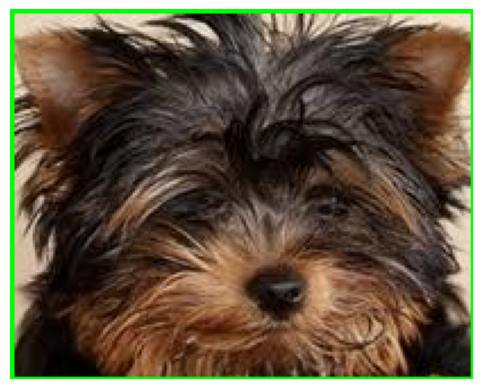

Image Name:  0947-BVhOGvKo4GQ_jpg.rf.9b7374c383ef85d4eb82d7806066d723.jpg


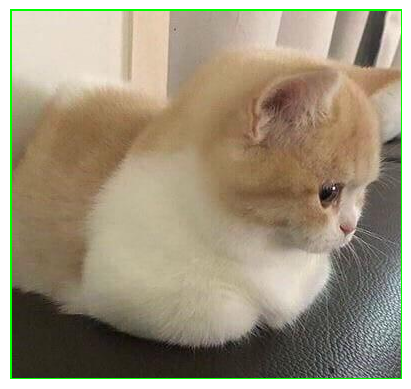

Image Name:  0827-9fQWsqEDiX0_jpg.rf.b44e2a7568e05a372d46c6214def58d7.jpg


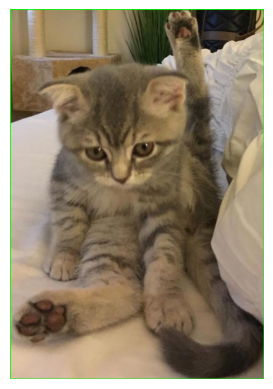

Image Name:  Dog-Sleep-134-_jpeg.rf.9709a5c285d112150894e821ed7817ba.jpg


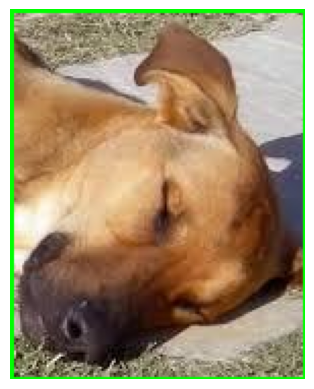

Image Name:  dog-Walk-14-_JPG.rf.afdf5f5f479431fc77bd1ca3fd9b6454.jpg


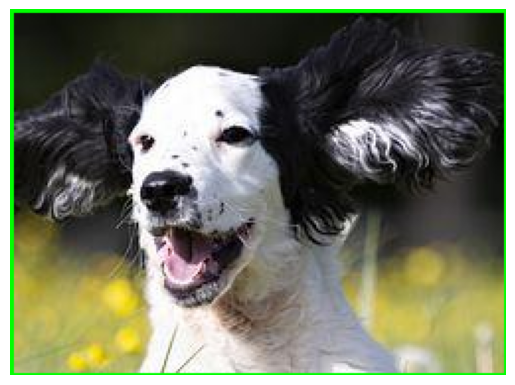

Image Name:  dog-Walk-106-_JPG.rf.fcb37613ef0d0b5ef76c66e7a7a54111.jpg


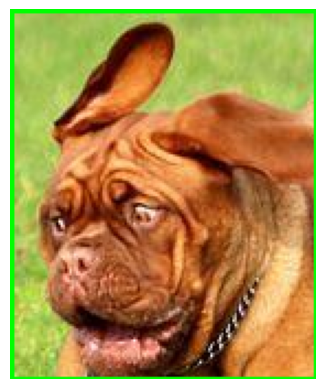

Image Name:  dog-Sleep-44-_JPG.rf.0b294f858a4d5c693da225bdea44c998.jpg


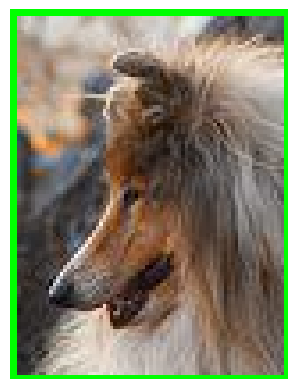

In [113]:
images_dir = "/kaggle/input/catdogmonkey/train/images"
labels_dir = "/kaggle/input/catdogmonkey/train/labels"

def read_labels(image_name):
    label_file = os.path.join(labels_dir, image_name.replace(".jpg", ".txt"))
    with open(label_file, "r") as file:
        lines = file.readlines()
        # Extract class and bounding box dimensions
        class_number, x, y, width, height = map(float, lines[0].split())
        return int(class_number), x, y, width, height

# Function to draw bounding boxes on images
def draw_boxes(image, x, y, width, height):
    x1 = int((x - width / 2) * image.shape[1])
    y1 = int((y - height / 2) * image.shape[0])
    x2 = int((x + width / 2) * image.shape[1])
    y2 = int((y + height / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Function to read images, extract bounding boxes, and display
def display_images_with_boxes():
    count = 0
    for image_name in os.listdir(images_dir):
        count += 1
        if count == 10:
            break
        if image_name.endswith(".jpg"):
            # Read image
            image_path = os.path.join(images_dir, image_name)
            image = cv2.imread(image_path)
            
            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read image '{image_name}'")
                continue
            
            # Read corresponding label
            class_number, x, y, width, height = read_labels(image_name)
            # Draw bounding box on image
            draw_boxes(image, x, y, width, height)
            
            # Extract region of interest (ROI) corresponding to bounding box
            roi_x1 = int((x - width / 2) * image.shape[1])
            roi_y1 = int((y - height / 2) * image.shape[0])
            roi_x2 = int((x + width / 2) * image.shape[1])
            roi_y2 = int((y + height / 2) * image.shape[0])
            roi = image[roi_y1:roi_y2, roi_x1:roi_x2]
            
            # Check if the ROI is successfully extracted
            if roi.size == 0:
                print(f"Error: Unable to extract ROI from image '{image_name}'")
                print(f"Bounding Box Coordinates: (x={x}, y={y}), Width={width}, Height={height}")
                print(f"Image Dimensions: {image.shape}")
                continue
                
            # Display only the bounding box region
            print("Image Name: ", image_name)
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
            
# Call the function to display images with bounding boxes
display_images_with_boxes()

**Feature Extraction**

In [114]:
# RESIZING TO 80,80
images_dir = "/kaggle/input/catdogmonkey/train/images"
labels_dir = "/kaggle/input/catdogmonkey/train/labels"

features = []
labels = []

# Function to read label files
def read_labels(image_name):
    label_file = os.path.join(labels_dir, image_name.replace(".jpg", ".txt"))
    with open(label_file, "r") as file:
        lines = file.readlines()
        # Extract class and bounding box dimensions
        class_number, x, y, width, height = map(float, lines[0].split())
        return int(class_number), x, y, width, height

# Function to draw bounding boxes on images
def draw_boxes(image, x, y, width, height):
    x1 = int((x - width / 2) * image.shape[1])
    y1 = int((y - height / 2) * image.shape[0])
    x2 = int((x + width / 2) * image.shape[1])
    y2 = int((y + height / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Function to read images, extract bounding boxes, and display
def display_images_with_boxes(features, labels):
    
    max_width = 0
    max_height = 0
    for image_name in os.listdir(images_dir):
        if image_name.endswith(".jpg"):
            # Read image
            image_path = os.path.join(images_dir, image_name)
            image = cv2.imread(image_path)
            # Check if the image is successfully loaded
            if image is None:
                print(f"Error: Unable to read image '{image_name}'")
                continue
            # Read corresponding label
            class_number, x, y, width, height = read_labels(image_name)
            # Draw bounding box on image
            draw_boxes(image, x, y, width, height)
            
            # Extract region of interest (ROI) corresponding to bounding box
            roi_x1 = int((x - width / 2) * image.shape[1])
            roi_y1 = int((y - height / 2) * image.shape[0])
            roi_x2 = int((x + width / 2) * image.shape[1])
            roi_y2 = int((y + height / 2) * image.shape[0])
            roi = image[roi_y1:roi_y2, roi_x1:roi_x2]
            
            max_width = max(max_width, roi.shape[1])
            max_height = max(max_height, roi.shape[0])
            roi = cv2.resize(roi, (80, 80))
            img_array1 = np.array(roi).flatten()
            features.append(img_array1)
            labels.append(class_number)

            '''
            if roi.size == 0:
                print(f"Error: Unable to extract ROI from image '{image_name}'")
                print(f"Bounding Box Coordinates: (x={x}, y={y}), Width={width}, Height={height}")
                print(f"Image Dimensions: {image.shape}")
                continue
            '''
    '''
    print("Display:",max_height, max_width)
    padded_features = []
    for image in features:
        print("Image:", image)
        padded_image = np.zeros((max_height), dtype=np.uint8)
        print("Pad:", padded_image)
        padded_image[image.shape[1]] = image
        padded_features.append(padded_image)
    padded_features = np.array(padded_features)
    return padded_features, labels
    '''
    features = np.array(features)
    labels = np.array(labels)
    return features, labels
    
# Call the function to display images with bounding boxes

features, labels = display_images_with_boxes(features, labels)
print("Features:",features)
print("Labels:",labels)

Features: [[  0 255   0 ...  72 226  81]
 [133 148 167 ...  32  39  55]
 [  0 255   0 ...   2 158   7]
 ...
 [255 210 166 ... 179 211 235]
 [  8 248   9 ...  62  94  74]
 [  0 255   0 ...  17 248  26]]
Labels: [1 0 1 ... 0 2 1]


**Extracted Features**

In [115]:
print("The number of Images in dataset : ",len(features))
print("Dimenstions of image array: ", features.shape)

The number of Images in dataset :  1839
Dimenstions of image array:  (1839, 19200)


**Split Train and Test Dataset**

In [116]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [117]:
print(x_train.shape)
print(y_train.shape)

(1287, 19200)
(1287,)


**Training Model : Single Layer Perceptron**

In [118]:
perceptron_model = Perceptron(max_iter=200, eta0=0.01)
train_accuracies = []
val_accuracies = []
for epoch in range(200):
    perceptron_model.partial_fit(x_train, y_train, classes = np.unique(y_train))
    y_train_pred = perceptron_model.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    y_val_pred = perceptron_model.predict(x_test)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/200 - Training Accuracy:{train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
y_test_pred = perceptron_model.predict(x_test)

Epoch 1/200 - Training Accuracy:0.5128, Validation Accuracy: 0.5036
Epoch 2/200 - Training Accuracy:0.5524, Validation Accuracy: 0.5562
Epoch 3/200 - Training Accuracy:0.7389, Validation Accuracy: 0.6884
Epoch 4/200 - Training Accuracy:0.7350, Validation Accuracy: 0.6775
Epoch 5/200 - Training Accuracy:0.7941, Validation Accuracy: 0.6866
Epoch 6/200 - Training Accuracy:0.8143, Validation Accuracy: 0.6848
Epoch 7/200 - Training Accuracy:0.8011, Validation Accuracy: 0.6703
Epoch 8/200 - Training Accuracy:0.8415, Validation Accuracy: 0.6975
Epoch 9/200 - Training Accuracy:0.8135, Validation Accuracy: 0.6902
Epoch 10/200 - Training Accuracy:0.8702, Validation Accuracy: 0.7264
Epoch 11/200 - Training Accuracy:0.8586, Validation Accuracy: 0.7047
Epoch 12/200 - Training Accuracy:0.8586, Validation Accuracy: 0.7228
Epoch 13/200 - Training Accuracy:0.8625, Validation Accuracy: 0.6920
Epoch 14/200 - Training Accuracy:0.8407, Validation Accuracy: 0.6848
Epoch 15/200 - Training Accuracy:0.8858, Va

In [119]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy for Single Layer perceptron model :{test_accuracy}\n\n\n")

Accuracy for Single Layer perceptron model :0.7010869565217391





**Training Model : Multilayer Perceptron**

In [120]:
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, alpha=0.0001,
                          solver='adam', verbose=10, random_state=42, tol=0.0001)
mlp_model.fit(x_train, y_train)
train_accuracy = mlp_model.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test set
y_test_pred = mlp_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy for Multilayer perceptron model : {test_accuracy:.4f}")

Iteration 1, loss = 21.04612526
Iteration 2, loss = 20.06933895
Iteration 3, loss = 18.86050112
Iteration 4, loss = 18.52636845
Iteration 5, loss = 17.57158312
Iteration 6, loss = 12.60969753
Iteration 7, loss = 11.56369614
Iteration 8, loss = 10.63988255
Iteration 9, loss = 8.33199545
Iteration 10, loss = 7.86152143
Iteration 11, loss = 9.06188329
Iteration 12, loss = 7.56717540
Iteration 13, loss = 6.86181121
Iteration 14, loss = 12.42715724
Iteration 15, loss = 17.19065373
Iteration 16, loss = 12.56232314
Iteration 17, loss = 8.54602387
Iteration 18, loss = 7.77383003
Iteration 19, loss = 8.24125681
Iteration 20, loss = 8.72043736
Iteration 21, loss = 8.45238288
Iteration 22, loss = 9.00498223
Iteration 23, loss = 11.07806333
Iteration 24, loss = 11.11229203
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training Accuracy: 0.8244
Accuracy for Multilayer perceptron model : 0.7192


**Predictions on Test Dataset**

In [121]:
images_dir = "/kaggle/input/catdogmonkey/test/images"
labels_dir = "/kaggle/input/catdogmonkey/test/labels"

testfeatures = []
testlabels = []

testfeatures, testlabels = display_images_with_boxes(testfeatures, testlabels)
print("Features:",testfeatures)
print("Labels:",testlabels)

Features: [[ 63  95 130 ... 217 255 254]
 [  0 255   0 ...   0 255   0]
 [  0 255   0 ...   0 254   0]
 ...
 [  0 255   0 ...  22 229  37]
 [  0 255   0 ...  26 146  24]
 [255 255 255 ... 114  89 235]]
Labels: [0 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 0 2 0 2 2 2 2 2 0 2
 2 2 2 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 0 2 2 2 0 0 2 2 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 0 2 1 2 0 2 0 2 1 2 2 1 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 0 0 2 0 0 2 0 2 0 0 0 2 2 0 0 2 0 2 0 2 2 0 2 2 0 1 0 2 2 0 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 0 2 1 0 2 2 2 0 2 2 0 0 0 2 0 2 2 2 2 1 2 2 0 0 2 2 2 2 2
 1 2 2 2 0 2 0 2 0 2 1 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 0 2 0 1
 0 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 0 0 2 0
 0 2 2 0 2 2 2 0 1 2 2 0 2 0 0 2 0 2 0 2 1 2 2 2 2 2 1 0 1 2 2 2 2 2 0 2 1
 0 2 2 2 0 2 0 0 0 2 2 2 2 2 0 2 0 0 2 2 2 1 0 0 0 2 2 1 2 2 0 2 2 0 1 2 2
 2 2 2 2 2 2 0]


In [122]:
print("The no of Images in dataset : ",len(testfeatures))
print("Dimenstions of image array: ", testfeatures.shape)

The no of Images in dataset :  377
Dimenstions of image array:  (377, 19200)


1. Single Layer Perceptron

In [123]:
test_data_y_pred_slp = perceptron_model.predict(testfeatures)
test_accuracy_slp = accuracy_score(testlabels, test_data_y_pred_slp)
print(test_accuracy_slp)

0.583554376657825


2. Multilayer Perceptron

In [124]:
test_data_y_pred_mlp = mlp_model.predict(testfeatures)
test_accuracy_mlp = accuracy_score(testlabels, test_data_y_pred_mlp)
print(test_accuracy_mlp)

0.6710875331564987
